## Observations and Insights 

In [1]:
# #Observations/Inferences
# 1. Strong correlation between weight and tumor size
# 2. plotting tumor size over time gives more insight as to 
# whether or not the treatment is effective compared to plotting the 
# average size of the tumor per regimen
# 3. Infubinol and Ceftamin have greater variabilitty in their tumor
# volume data compared to Capomulin and Ramicane. Infubinol and Ceftamin
# mice also had larger tumors on average, so that could account for the 
# greater variability

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# mouse_metadata.head()
# study_results.head()
# Display the data table for preview
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
merge_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
total_mice = len(merge_df["Mouse ID"].unique())
total_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_df = merge_df[merge_df[["Mouse ID", "Timepoint"]].duplicated()]
duplicate_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_ids = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids
clean_df = merge_df[merge_df["Mouse ID"].isin(duplicate_mouse_ids) == False]
print(len(clean_df["Mouse ID"].unique()))
clean_df


248


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# get relevant columns
summary_tumor_df = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]]
# set index to drug regimen
summary_tumor_index = summary_tumor_df.set_index("Drug Regimen")
# groupby drug regimen
tumor_df = summary_tumor_index.groupby("Drug Regimen")
# set variable for tumor volume
tumor_vol = tumor_df["Tumor Volume (mm3)"]
# calculate statistics
avg_tumor = tumor_vol.mean()
median_tumor = tumor_vol.median()
var_tumor = tumor_vol.var()
stdev_tumor = tumor_vol.std()
sem_tumor = tumor_vol.sem()
# build dataframe
summary_df = pd.DataFrame({"Mean Tumor Volume": avg_tumor,
              "Median Tumor Volume": median_tumor,
              "Tumor Volume Variance": var_tumor,
              "Tumor Volume Std. Dev": stdev_tumor,
              "Tumor Volume Std. Err": sem_tumor})

summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# df[['col1', 'col2', 'col3', 'col4']].groupby(['col1', 'col2']).agg(['mean', 'count'])

df = summary_tumor_index.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])
df
# This method produces everything in a single groupby function


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'mm3')

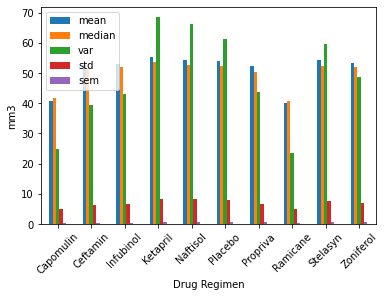

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
legend_labels = ["mean", "median", "var", "std", "sem"]
regimen_plot = df.plot(kind="bar", rot=45)
regimen_plot.legend(legend_labels, loc="upper left")
regimen_plot.set_ylabel("mm3")


<function matplotlib.pyplot.show(*args, **kw)>

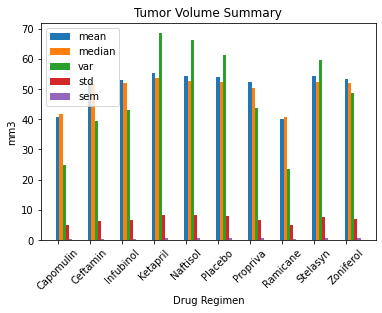

In [9]:
# drugs = summary_df["Drug Regimen"]
x_labels = summary_df.index
mean = summary_df["Mean Tumor Volume"]
median = summary_df["Median Tumor Volume"]
variance = summary_df["Tumor Volume Variance"]
stdev =  summary_df["Tumor Volume Std. Dev"]
sem = summary_df["Tumor Volume Std. Err"]
width = .1
x_axis = np.arange(len(summary_df.index))

plt.bar(x_axis, mean, width)
plt.bar(x_axis + (width), median, width)
plt.bar(x_axis + (width*2), variance, width)
plt.bar(x_axis + (width*3), stdev, width)
plt.bar(x_axis + (width*4), sem, width)
plt.title("Tumor Volume Summary")
plt.ylabel("mm3")
plt.xlabel("Drug Regimen")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_labels, rotation=45)
plt.legend(legend_labels)
plt.show

Text(0.5, 1.0, 'Data Points for Each Treatment')

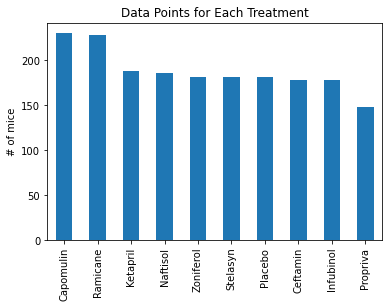

In [10]:
data_points_df = clean_df[["Drug Regimen"]]
total_mice = data_points_df["Drug Regimen"].value_counts()
total_mice_df = pd.DataFrame({"Number of Mice": total_mice})
total_mice_plot = total_mice_df.plot(kind="bar", rot=90, legend=False)
total_mice_plot.set_ylabel("# of mice")
total_mice_plot.set_title("Data Points for Each Treatment")


<BarContainer object of 10 artists>

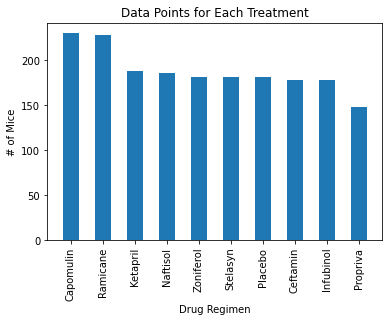

In [11]:
x_axis = total_mice_df.index

plt.title("Data Points for Each Treatment")
plt.ylabel("# of Mice")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
width = 0.5

plt.bar(x_axis, total_mice, width)

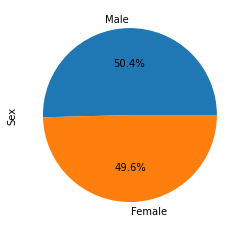

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = clean_df[["Mouse ID", "Sex"]]
gender_dup = gender_df.drop_duplicates(subset="Mouse ID", keep= "first")
gender_index = gender_dup.set_index("Mouse ID")
total_gender = gender_index["Sex"].value_counts()
gender = total_gender.index

gender_sum = gender_index["Sex"].count()
total_gender_df = pd.DataFrame({"Sex": total_gender,
                                "Percent": ((total_gender/gender_sum)*100)})
                                
labels = total_gender_df["Percent"].values
pandas_pie = total_gender
pandas_pie.plot(kind="pie", autopct='%1.1f%%')


Text(0.5, 1.0, 'Male vs Female Mice')

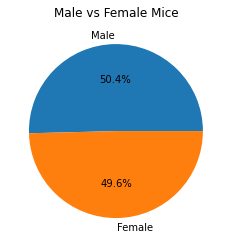

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(total_gender.values,labels=total_gender.index.values,autopct='%1.1f%%')
plt.title("Male vs Female Mice")

## Quartiles, Outliers and Boxplots

In [14]:
# # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumor = clean_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_data = max_tumor.merge(clean_df,on=['Mouse ID','Timepoint'],how="left")
merged_data_clean = merged_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
merged_data_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a262,45,70.717621,Placebo
3,a275,45,62.999356,Ceftamin
4,a366,30,63.440686,Stelasyn
...,...,...,...,...
243,z435,10,48.710661,Propriva
244,z578,45,30.638696,Ramicane
245,z581,45,62.754451,Infubinol
246,z795,45,65.741070,Naftisol


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_list = []
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data_clean.loc[merged_data_clean["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    higherq = quartiles[.75]
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    iqr = higherq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    lower_bound
    upper_bound = higherq + (1.5*iqr)
    upper_bound
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(*args, **kw)>

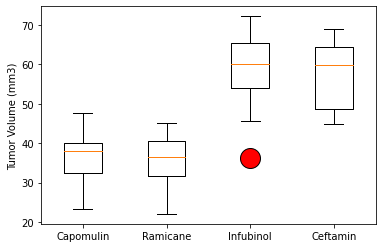

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange = dict(markerfacecolor="red", markersize="20")
plt.boxplot(tumor_vol_list, labels = drug_list, flierprops=orange)
plt.ylabel('Tumor Volume (mm3)')
plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

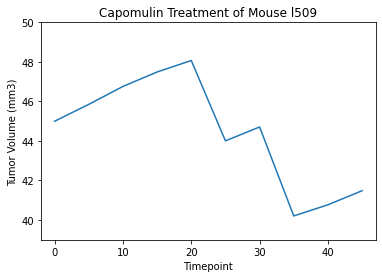

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse_data = merge_df.loc[merge_df["Mouse ID"] == "l509"]
x_axis = mouse_data["Timepoint"]
y_axis = mouse_data["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(-2, 47)
plt.ylim(39, 50)
plt.show



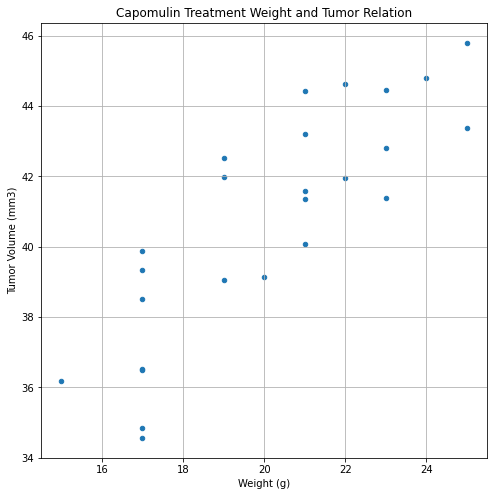

In [18]:
drug_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
df_mean = drug_data.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
df_mean = df_mean.reset_index()
weight_data = drug_data[["Mouse ID", "Weight (g)"]]
merge_weight = df_mean.merge(weight_data, on=["Mouse ID"], how="left")
weight_drop = merge_weight.drop_duplicates(subset=['Mouse ID', "Tumor Volume (mm3)", "Weight (g)"])


weight_drop.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Capomulin Treatment Weight and Tumor Relation")
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.7088568047708717


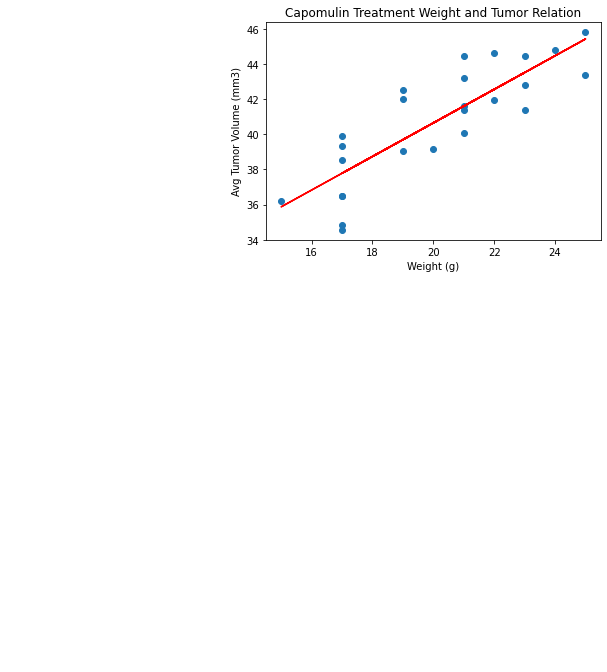

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = weight_drop['Weight (g)']
y_values = weight_drop['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Capomulin Treatment Weight and Tumor Relation")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
print(f"The correlation between mouse weight and average tumor volume is: {rvalue**2}")
plt.show()


